In [118]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [119]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [120]:
#importing ml libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,accuracy_score

In [121]:
path='/content/drive/MyDrive/data sets/train-data.csv'
dfz=pd.read_csv(path)

In [122]:
# Removing column New_price and cleaning the data
# Expanding Name into company name and car name and removing the preexisting name column
# Removing the string part of mileage, Engine and power and making the data type into float

In [123]:
def wrangle(filepath):
  df=pd.read_csv(filepath)
  df.drop(columns='New_Price',inplace=True)
  df=df.dropna()

  #Creating New Column
  df['Company_Name']=df['Name'].str.split(' ').str[0]

  #Mileage
  df['Mileage']=df['Mileage'].str.split(' ').str[0]
  df['Mileage']=df['Mileage'].astype(float)

  #Engine
  df['Engine']=df['Engine'].str.split(" ").str[0]
  df['Engine']=df['Engine'].astype(int)

  #Power
  df.drop(columns='Power',inplace=True)

  #Dropping Columns
  df.drop(columns='Unnamed: 0',inplace=True)
  df.drop(columns='Name',inplace=True)

  #Quantile
  low,high=df['Price'].quantile([0.05,0.95])
  mask_price=df['Price'].between(low,high)
  df=df[mask_price]

  low,high=df['Kilometers_Driven'].quantile([0.05,0.95])
  mask_distance=df['Kilometers_Driven'].between(low,high)
  df=df[mask_distance]

  #Rearranging the Data of Price to remove outlyers from the data
  df['Price']=np.log(df['Price'])

  return df

In [124]:
df=wrangle('/content/drive/MyDrive/data sets/train-data.csv')

In [125]:
df.shape

(4843, 11)

In [126]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5.0,0.559616,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5.0,2.525729,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5.0,1.504077,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7.0,1.791759,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5.0,2.875822,Audi


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4843 non-null   object 
 1   Year               4843 non-null   int64  
 2   Kilometers_Driven  4843 non-null   int64  
 3   Fuel_Type          4843 non-null   object 
 4   Transmission       4843 non-null   object 
 5   Owner_Type         4843 non-null   object 
 6   Mileage            4843 non-null   float64
 7   Engine             4843 non-null   int64  
 8   Seats              4843 non-null   float64
 9   Price              4843 non-null   float64
 10  Company_Name       4843 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 454.0+ KB


In [128]:
x_train=df.drop(columns='Price')

In [129]:
y_train=df['Price']

In [130]:
x_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Company_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5.0,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5.0,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5.0,Audi
...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,5.0,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,5.0,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,8.0,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,5.0,Maruti


In [131]:
y_train

0       0.559616
1       2.525729
2       1.504077
3       1.791759
4       2.875822
          ...   
6014    1.558145
6015    1.386294
6016    1.064711
6017    0.974560
6018    0.916291
Name: Price, Length: 4843, dtype: float64

In [132]:
from sklearn. preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge

In [133]:
ohe=OneHotEncoder()

In [134]:
ohe.fit(x_train)

XT_train = ohe.transform(x_train)
print(XT_train.shape)

(4843, 3130)


In [135]:
from sklearn.pipeline import make_pipeline

In [136]:
model=make_pipeline(
    OneHotEncoder(),
    LinearRegression()
)
model.fit(x_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('linearregression', LinearRegression())])

In [137]:
y_prediction=model.predict(x_train)

In [138]:
print('R2_score',r2_score(y_train,y_prediction))

R2_score 0.9838397253155933


In [139]:
print('Mean_Absoute_Error',mean_absolute_error(y_train,y_prediction))

Mean_Absoute_Error 0.046297119920139525


Deployment of my model using Widgets and def

In [140]:
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [141]:
df.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,5.0,0.559616,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,5.0,2.525729,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,5.0,1.504077,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,7.0,1.791759,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,5.0,2.875822,Audi
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814,5.0,0.854415,Hyundai
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,5.0,1.252763,Nissan
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,8.0,2.862201,Toyota
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598,5.0,1.648659,Volkswagen
9,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248,5.0,0.667829,Tata


In [142]:
def make_prediction(Location,Year,Kilometer,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Company_Name):
  data={
      'Location': Location,
      'Year': Year,
      'Kilometers_Driven': Kilometer,
      'Fuel_Type': Fuel_Type,
      'Transmission': Transmission,
      'Owner_Type': Owner_Type,
      'Mileage': Mileage,
      'Engine': Engine,
      'Seats': Seats,
      'Company_Name': Company_Name
  }
  df=pd.DataFrame(data,index=[0])
  prediction=model.predict(df)
  return 10**prediction[0]

In [146]:
make_prediction('Bangalore',2015,64430,'Petrol','Manual','First',26.6,998,5.0,'Fiat')

13.96528233108032

In [144]:
df['Company_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Isuzu', 'ISUZU', 'Force'], dtype=object)

<ipython-input-145-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

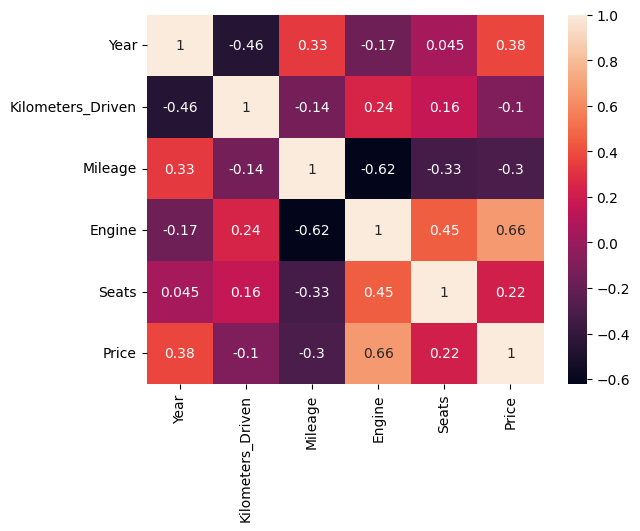

In [145]:
sns.heatmap(df.corr(),annot=True)

In [147]:
df.head(1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.6,998,5.0,0.559616,Maruti


In [159]:
interact(
    make_prediction,
    Location=Dropdown(options=sorted(x_train['Location'].unique())),

    Year=Dropdown(options=sorted(x_train['Year'].unique())),

    Kilometer=Dropdown(options=sorted(x_train['Kilometers_Driven'].unique())),


    Fuel_Type=Dropdown(options=sorted(x_train['Fuel_Type'].unique())),

    Transmission=Dropdown(options=sorted(x_train['Transmission'].unique())),

    Owner_Type=Dropdown(options=sorted(x_train['Owner_Type'].unique())),

    Mileage=Dropdown(options=sorted(x_train['Mileage'].unique())),

    Engine=Dropdown(options=sorted(x_train['Engine'].unique())),

    Seats=Dropdown(options=sorted(x_train['Seats'].unique())),

    Company_Name=Dropdown(options=sorted(x_train['Company_Name'].unique())),

);

interactive(children=(Dropdown(description='Location', options=('Ahmedabad', 'Bangalore', 'Chennai', 'Coimbato…

In [156]:
df['Engine'].value_counts()

1197    532
1248    452
1498    286
998     215
1198    215
       ... 
1978      1
1950      1
1422      1
2495      1
1797      1
Name: Engine, Length: 126, dtype: int64